## IMPORT LIBRARIES AND DATASET

In [84]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [85]:
with open('train.p',mode='rb') as training_data:
    train = pickle.load(training_data)
with open('valid.p',mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open('test.p',mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [86]:
X_train,y_train = train['features'], train['labels']
X_validation,y_validation = valid['features'],valid['labels']
X_test,y_test = test['features'],test['labels']

In [87]:
X_train.shape

(34799, 32, 32, 3)

In [88]:
y_train.shape

(34799,)

## IMAGE EXPLORATION

37

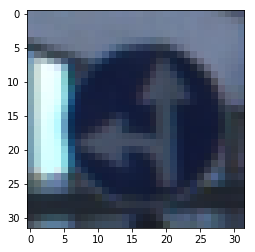

In [89]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

## DATA PREPARATION

In [90]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [91]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims=True)

In [92]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [93]:
X_train_gray.shape

(34799, 32, 32, 1)

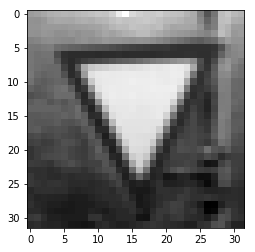

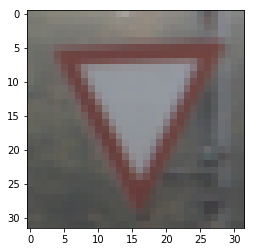

In [94]:
i = 700
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])

## MODEL TRAINING

In [95]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam



In [96]:
image_shape = X_train_gray[i].shape

In [97]:
cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(tf.keras.layers.MaxPooling2D())

cnn_model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D())

cnn_model.add(tf.keras.layers.Flatten())

cnn_model.add(tf.keras.layers.Dense(units=120,activation='relu'))

cnn_model.add(tf.keras.layers.Dense(units=84, activation='relu'))

cnn_model.add(tf.keras.layers.Dense(units=43,activation='softmax'))




In [98]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [99]:
history = cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,nb_epoch=20,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

W0322 05:08:45.321949 4722251200 training.py:792] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 12s 338us/sample - loss: 3.1118 - accuracy: 0.2028 - val_loss: 2.4551 - val_accuracy: 0.3893
Epoch 2/20
34799/34799 [==============================] - 11s 327us/sample - loss: 1.4462 - accuracy: 0.6112 - val_loss: 1.2655 - val_accuracy: 0.6723
Epoch 3/20
34799/34799 [==============================] - 11s 324us/sample - loss: 0.7567 - accuracy: 0.7936 - val_loss: 0.9355 - val_accuracy: 0.7338
Epoch 4/20
34799/34799 [==============================] - 11s 329us/sample - loss: 0.5238 - accuracy: 0.8619 - val_loss: 0.8304 - val_accuracy: 0.7846
Epoch 5/20
34799/34799 [==============================] - 11s 323us/sample - loss: 0.4011 - accuracy: 0.8941 - val_loss: 0.7333 - val_accuracy: 0.8007
Epoch 6/20
34799/34799 [==============================] - 12s 352us/sample - loss: 0.3204 - accuracy: 0.9184 - val_loss: 0.6432 - val_accuracy: 0.8372
Epoch 7/20
34799/34799 [=====================

## MODEL EVALUATION

In [100]:
score = cnn_model.evaluate(X_test_gray_norm,y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8865


In [101]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

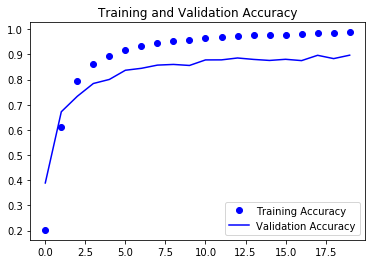

In [104]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

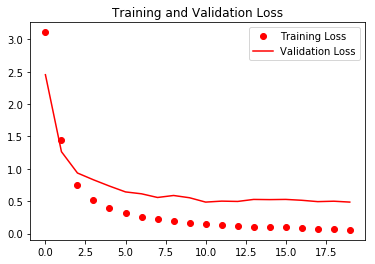

In [105]:
plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [106]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test

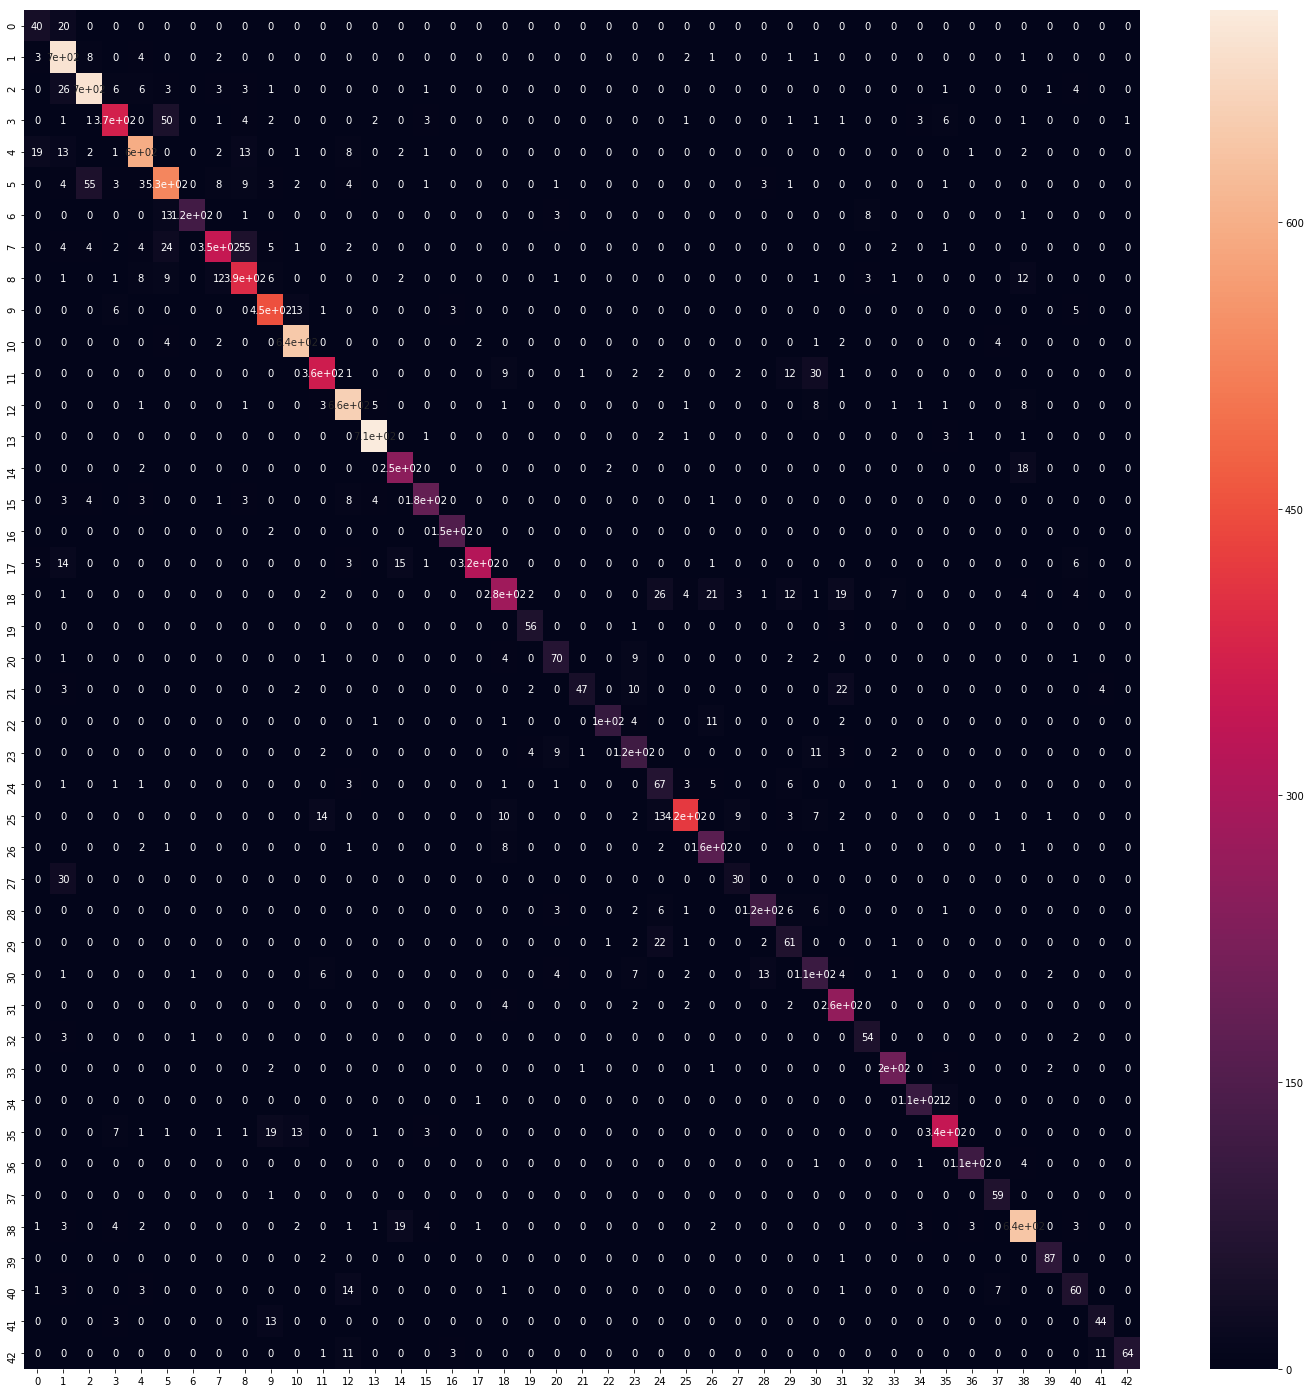

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

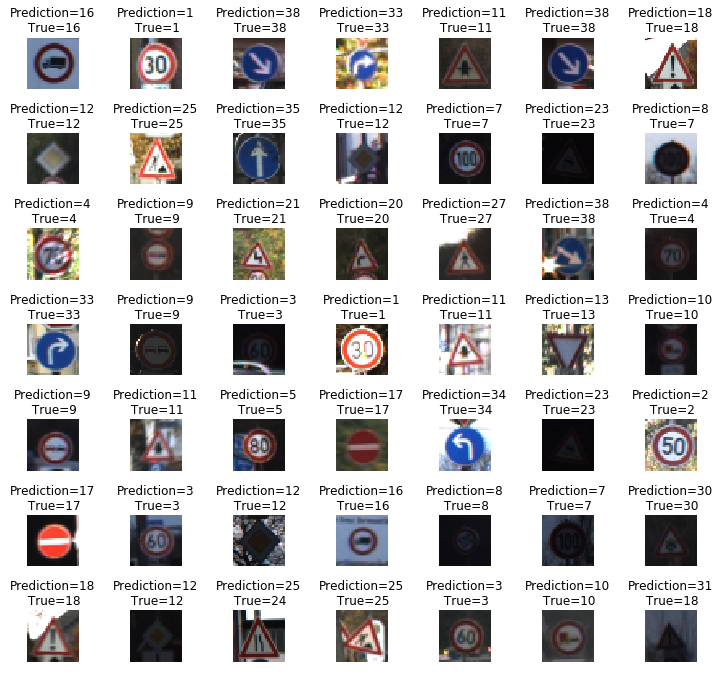

In [108]:
L = 7
W = 7
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)